# Business Understanding

In this decade, when climate change and rising global temperatures has a huge impact on planet earth (melting glaciers,  rising sea levels and intense heat waves), this project is aimed at gaining a greater understanding how the temperatures changed over the past 50 years. 
Using the global average temperature data (both from land and sea) from 1743 to 2013 to analyze any trend, seasonality or cyclicality. Which years/decades had the highest increase in temperature in the last 50 years ? What was the min, max and variance ? Based on past years data, could we predict temperature for future years?


# Data Understanding

In order to answer the business question, am using the data from kaggle that has the temperature data on a monthly basis from 1750 and the following features. The data needs to be cleansed and transformed to be used in the analysis:



# Data Features

Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
LandAverageTemperature: global average land temperature in celsius
LandAverageTemperatureUncertainty: the 95% confidence interval around the average
LandMaxTemperature: global average maximum land temperature in celsius
LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
LandMinTemperature: global average minimum land temperature in celsius
LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

Target Variable : LandAverageTemperature

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krana002/UCB_MLAI/main/UCB_Capstone_Project/GlobalTemperatures.csv')

In [3]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 2. Investigate the dataset for missing or problematic data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


# Exploratory Data Analysis

<AxesSubplot:>

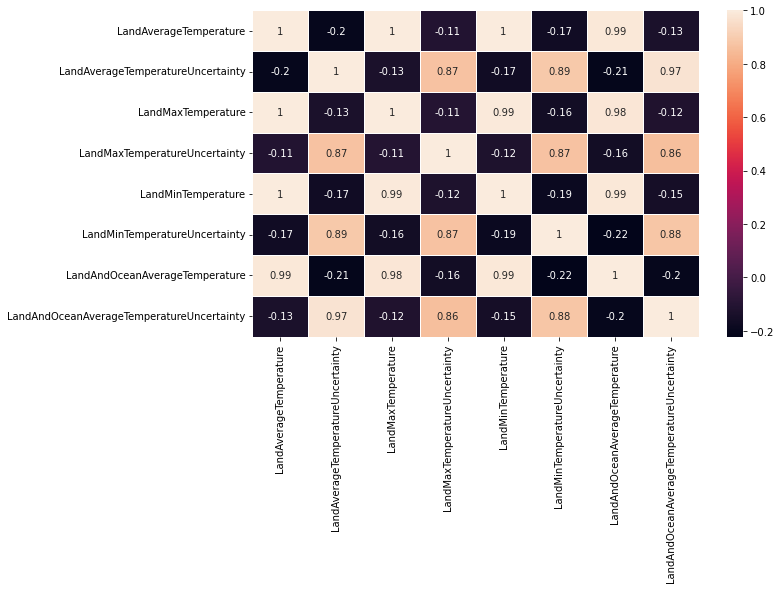

In [5]:
# Doing a heatmap to check if there are any correlations with the numerical data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidth=1)

Dataset has all numerical values. 
High Correlation exist among all the variables:
LandAverageTemperature to LandMaxTemperature, LandMinTemperature, LandAndOceanAverageTemperature

LandAverageTemperatureUncertainty to LandMaxTemperatureUncertainty,LandMinTemperatureUncertainty, LandAndOceanAverageTemperatureUncertainty

LandMaxTemperature to LandAverageTemperature, LandMinTemperature, LandAndOceanAverageTemperature
LandMaxTemperatureUncertainty to LandAverageTemperatureUncertainty, LandMinTemperatureUncertainty

LandMinTemperature to LandAverageTemperature, LandMaxTemperature, LandAndOceanAverageTemperature

LandMinTemperatureUncertainty to LandAverageTemperatureUncertainty,LandMaxTemperatureUncertainty, 
LandAndOceanAverageTemperatureUncertainty 

LandAndOceanAverageTemperature to LandAverageTemperature, LandMaxTemperature, LandMinTemperature, 

LandAndOceanAverageTemperatureUncertainty to LandAverageTemperatureUncertainty, 
LandMaxTemperatureUncertainty,LandMinTemperatureUncertainty,  

So, clearly high correlation exists among the average, min, max and uncertaintly values of land and ocean. 

In [6]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [7]:
#Check columns for missing/null values
missing_vals = df.isnull().sum()
missing_vals

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [8]:
#Investigate 'LandMaxTemp' column with missing data
df['LandMaxTemperature'].value_counts()

20.037    3
8.555     3
19.987    3
17.713    3
10.781    3
         ..
19.539    1
20.058    1
19.287    1
17.146    1
12.892    1
Name: LandMaxTemperature, Length: 1814, dtype: int64

In [9]:
#Investigate 'LandAndOceanAverageTemperature' column with missing data
df['LandAndOceanAverageTemperature']
df['LandAndOceanAverageTemperature'].value_counts()

15.005    5
15.927    4
16.846    4
13.311    4
16.496    4
         ..
15.757    1
13.441    1
13.160    1
13.225    1
14.774    1
Name: LandAndOceanAverageTemperature, Length: 1596, dtype: int64

Text(0, 0.5, 'Count')

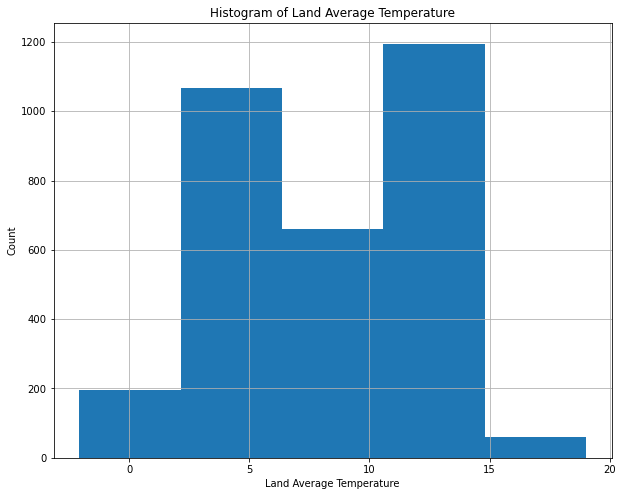

In [10]:
plt.figure(figsize=(10,8))
df["LandAverageTemperature"].hist(bins=5)
plt.title('Histogram of Land Average Temperature')
plt.xlabel('Land Average Temperature')
plt.ylabel('Count')

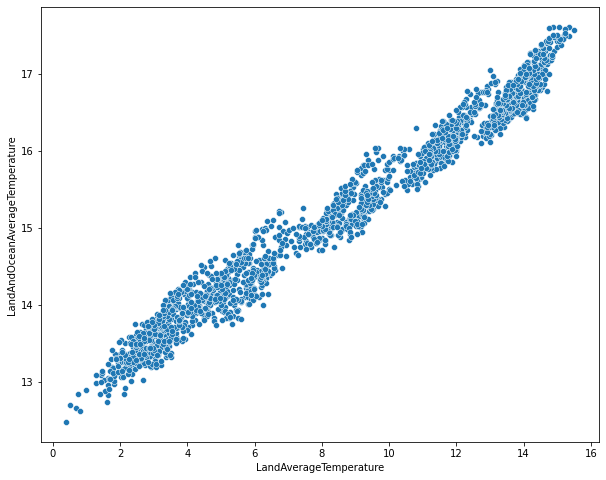

In [11]:
# Plotting the correlation between LandAverageTemperature and LandAndOceanAverageTemperature
plt.figure(figsize=(10,8))
sns.scatterplot(x="LandAverageTemperature", y="LandAndOceanAverageTemperature", data=df)
plt.show()

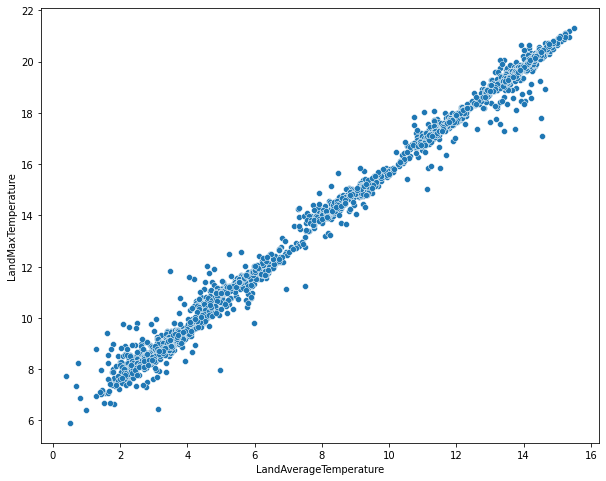

In [12]:
# Plotting the correlation between LandAverageTemperature and LandMaxAverageTemperature
plt.figure(figsize=(10,8))
sns.scatterplot(x="LandAverageTemperature", y="LandMaxTemperature", data=df)
plt.show()

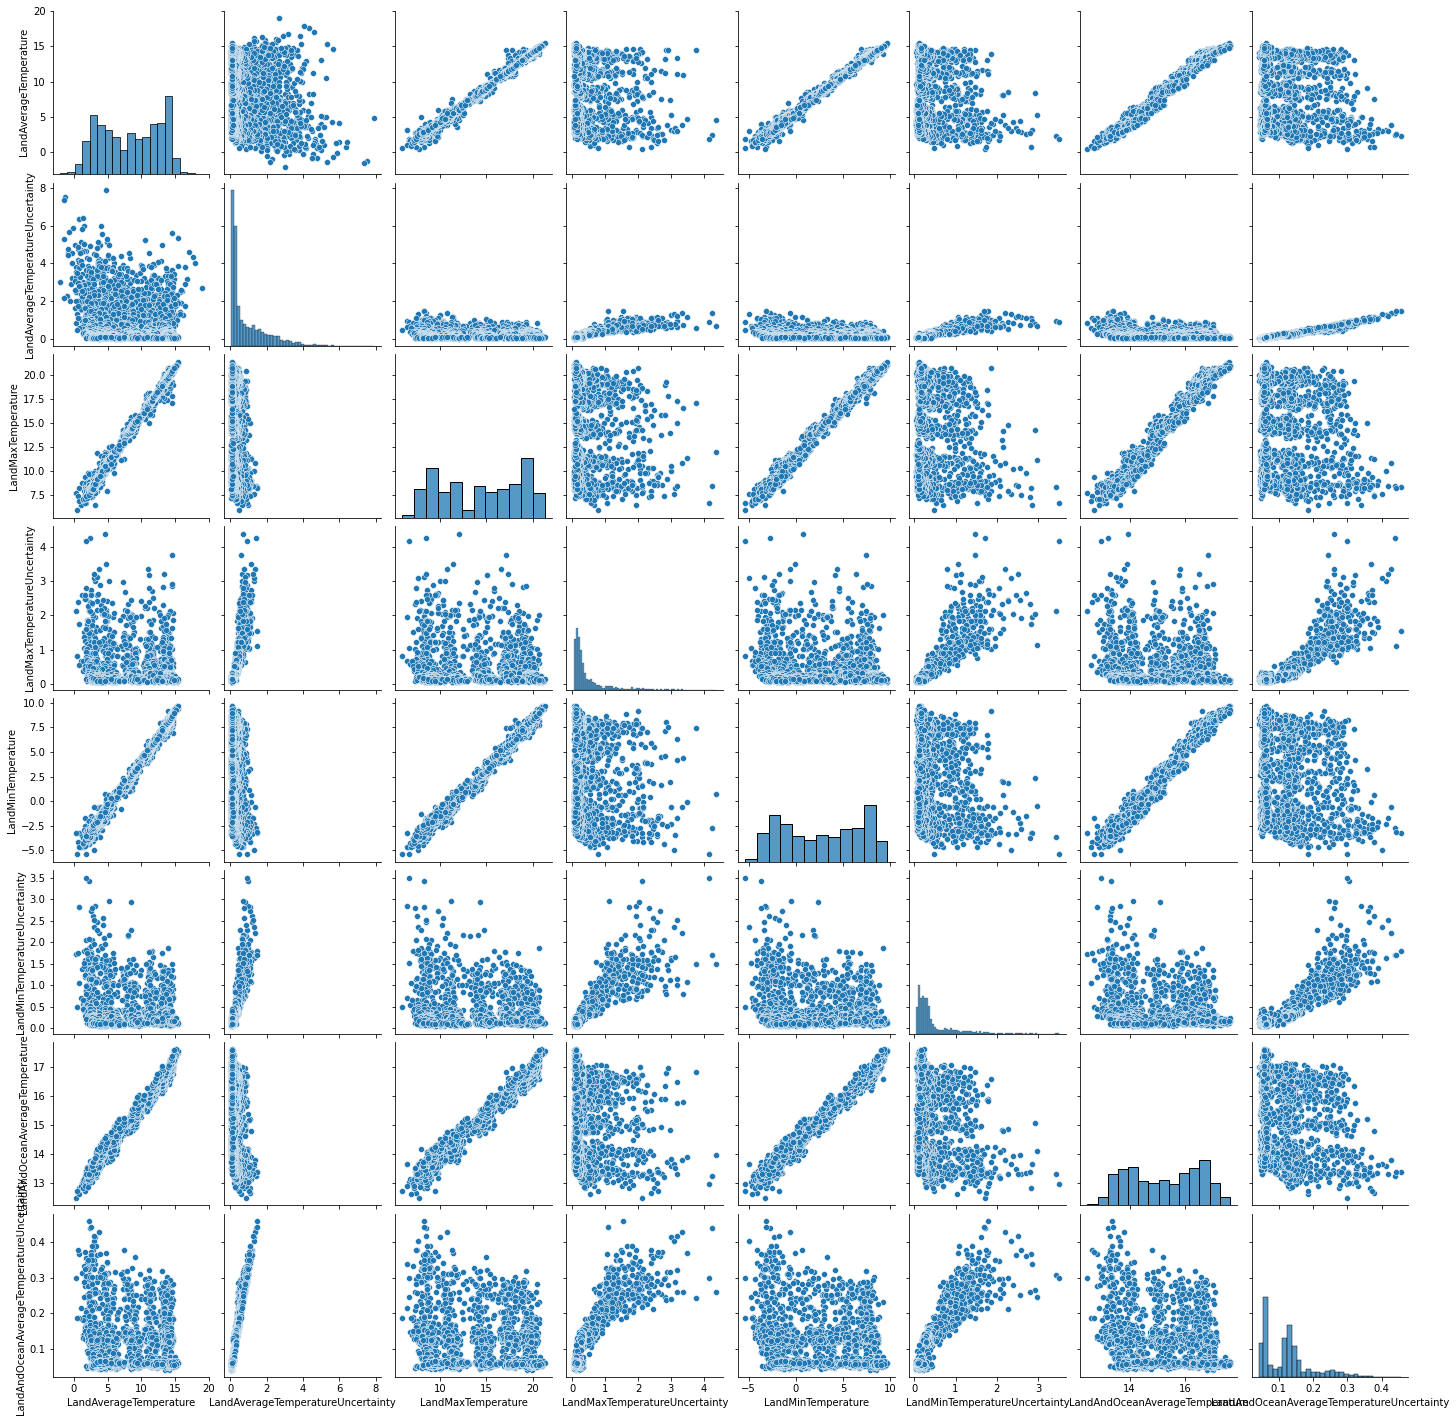

In [13]:
# Plotting the correlation wtth all variables 
sns.pairplot(df)
plt.show()

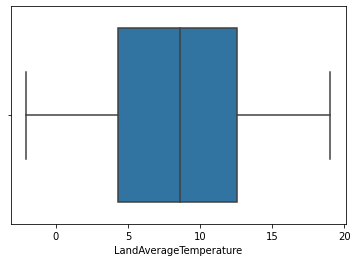

In [14]:
sns.boxplot(df["LandAverageTemperature"])
plt.show()

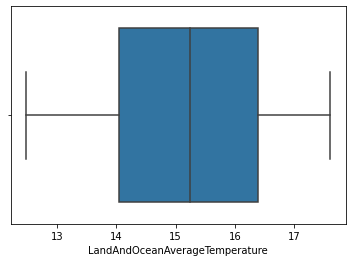

In [15]:
sns.boxplot(df["LandAndOceanAverageTemperature"])
plt.show()

In [16]:
#The above boxplot gives that the LandAndOceanAverageTemperature were much higher compared to the LandAverageTemperature

# Data Preparation

Remove data rows that have null values
Transform the monthly data to yearly data to see trend, seasonality and cyclicality
Drop closely correlated columns that will not add value to the final modeling 


In [17]:
# We noted null data in many of the columns above including the main variable LandAverageTemperature. 
# Also, null values are noted in rows before 1850. For the purpose of analysis, that data may not be much helpful
# in predicting future temperatures. Hence, removed from the data set.
df_clean=df.dropna()
df_clean.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


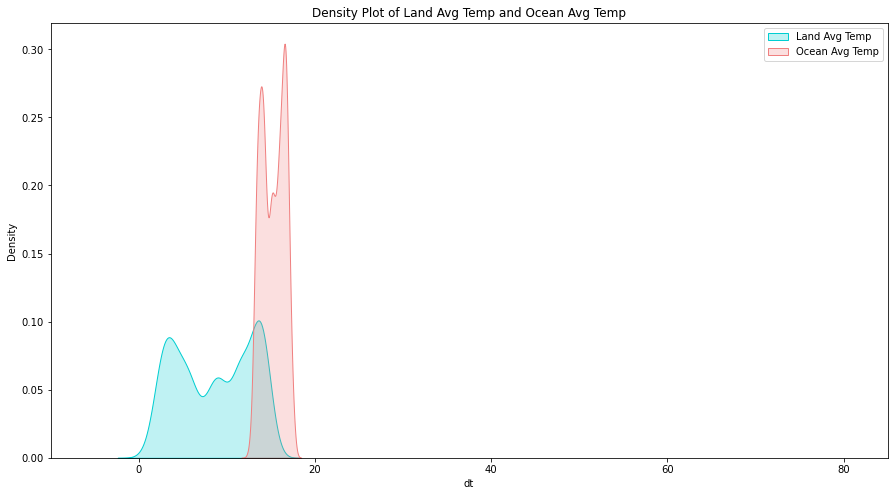

In [19]:
# Plotting the land and ocean average monthly temperature to see how they compare against each other 
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_clean["LandAverageTemperature"], color="darkturquoise", fill=True)
sns.kdeplot(df_clean["LandAndOceanAverageTemperature"], color="lightcoral", fill=True)
plt.legend(['Land Avg Temp', 'Ocean Avg Temp'])
plt.title('Density Plot of Land Avg Temp and Ocean Avg Temp')
ax.set(xlabel='dt')
plt.xlim(-10,85)
plt.show()
# The Ocean average temperature is much higher than the land average temperature but the land average temperature 
# varied more widely

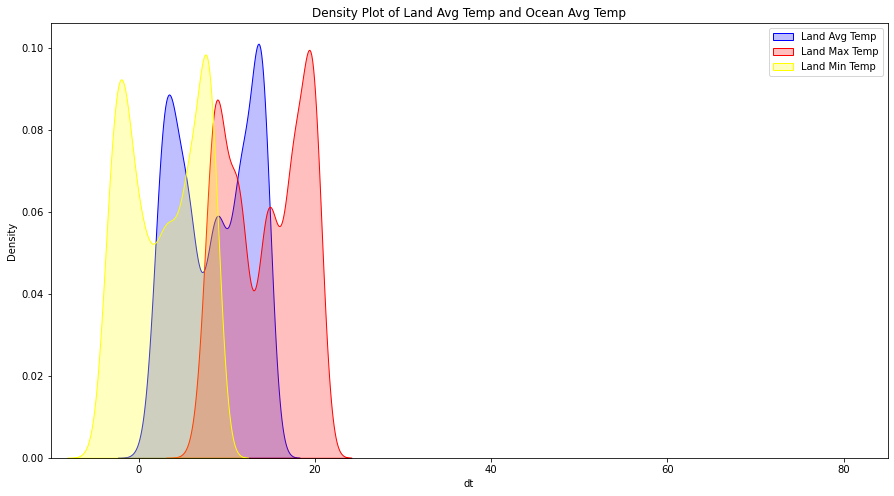

In [20]:
# Plotting the land average, min and max monthly temperatures to see the trend 
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_clean["LandAverageTemperature"], color="blue", fill=True)
sns.kdeplot(df_clean["LandMaxTemperature"], color="red", fill=True)
sns.kdeplot(df_clean["LandMinTemperature"], color="yellow", fill=True)
plt.legend(['Land Avg Temp', 'Land Max Temp', 'Land Min Temp'])
plt.title('Density Plot of Land Avg Temp and Ocean Avg Temp')
ax.set(xlabel='dt')
plt.xlim(-10,85)
plt.show()
# Pedicatbly the min and max graphs follow the same trend lines as land average temperature which makes us 
# believe that if we use the land average temperature, it will be a good indicator of how the min and max may vary 

In [21]:
#Since the data is provided at a monthly level, checking to see if the LandAveragetemperatures show seasonality and if we need to make special adjustments with that.
# So, using the below table to convert the data to monthly leve and plotting the same. 

def monthly_temp_table(df):
    df["Year"] = pd.to_datetime(df["dt"], format="%Y-%m-%d").dt.year
    df["Month"] = pd.to_datetime(df["dt"], format="%Y-%m-%d").dt.month_name()
    table = pd.pivot_table(df, values="LandAverageTemperature", index="Year", columns="Month")
    table.columns = pd.date_range(start='1/1/1850', periods=12, freq='M').strftime('%B')
    return table


table = monthly_temp_table(df_clean)

table = table.reset_index()
table = pd.melt(table, id_vars=["Year"], var_name="Month", value_name="Temperature")
fig = px.line(table, x="Year", y="Temperature", color="Month")
fig.update_layout(title="Land Average Temperature", xaxis_title="Year", yaxis_title="Temperature")
fig.show("png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


The above plot shows that the temperatures increased consistenty across all the months of the year (increasing trend). 
So, if we take the average temperature for the year, that would be hepful for us to predict future temperatures and use in regression analysis.

In [ ]:
# Below function to convert the data to yearly basis so that it can be helpful for linear regression. 


def data_sorting_algorithm(df):
    # Read data from xlsx file
    #df = pd.read_excel(excel_file)

    # Extract the year from the 'dt' column and convert it into a datetime index.
    df['dt'] = pd.DatetimeIndex(df['dt']).year

    # Calculate mean of 'LandAverageTemperature' by year
    land_temp_df = df.groupby('dt')['LandAverageTemperature'].mean().reset_index()
    land_temp_df.columns = ['dt', 'LandAverageTemperature']

    # Calculate mean of 'LandAverageTemperatureUncertainty' by year
    land_uncertainty_temp_df = df.groupby('dt')['LandAverageTemperatureUncertainty'].mean().reset_index()
    land_uncertainty_temp_df.columns = ['dt', 'LandAverageTemperatureUncertainty']
    
    # Calculate max of 'LandMaxTemperature' by year
    max_temp_df = df.groupby('dt')['LandMaxTemperature'].max().reset_index()
    max_temp_df.columns = ['dt', 'LandMaxTemperature']

    # Calculate min of 'LandMinTemperature' by year
    min_temp_df = df.groupby('dt')['LandMinTemperature'].min().reset_index()
    min_temp_df.columns = ['dt', 'LandMinTemperature']

    # Calculate mean of 'LandAndOceanAverageTemperature' by year.
    ocean_temp_df = df.groupby('dt')['LandAndOceanAverageTemperature'].mean().reset_index()
    ocean_temp_df.columns = ['dt', 'LandAndOceanAverageTemperature']
    
    # Calculate mean of 'LandAndOceanAverageTemperatureUncertainty' by year
    ocean_uncertainty_temp_df = df.groupby('dt')['LandAndOceanAverageTemperatureUncertainty'].mean().reset_index()
    ocean_uncertainty_temp_df.columns = ['dt', 'LandAndOceanAverageTemperatureUncertainty']

    # Merge all dataframes on 'dt' using the .merge function here one by one for each dataframe. 
    result_df = pd.merge(land_temp_df, max_temp_df, on='dt')
    result_df = pd.merge(result_df, min_temp_df, on='dt')
    result_df = pd.merge(result_df, ocean_temp_df, on='dt')
    result_df = pd.merge(result_df, land_uncertainty_temp_df, on='dt')
    result_df = pd.merge(result_df, ocean_uncertainty_temp_df, on='dt')

    # Print the result using the .to_string function. The index param removes the index thing. This funciton renders a dataframe in a console-friendly tabular output(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html))
    # print(result_df.to_string(index=False))
    # return result_df.to_string(index=False)
    return result_df

In [ ]:
df_yearly = data_sorting_algorithm(df_clean)


In [ ]:
# Drawing graph to see how the key variables LandAverageTemperature, LandMaxTemperature, LandMinTemperature and LandAndOceanTemperature trend over time (across centuries).   


date = df_yearly["dt"]
land_avg = df_yearly["LandAverageTemperature"]
land_max = df_yearly["LandMaxTemperature"]
land_min = df_yearly["LandMinTemperature"]
ocean_avg = df_yearly["LandAndOceanAverageTemperature"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=date, y=land_max, name='Land Max Temp',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=date, y=land_avg, name = 'Land Avg Temp',
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=date, y=land_min, name='Land Min Temp',
                         line=dict(color='orange', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=date, y=ocean_avg, name='Ocean Avg Temp',
                         line = dict(color='royalblue', width=4, dash='dash')))

# Edit the layout
fig.update_layout(title='Average, Max and Min Temperatures (Land, Ocean)',
                   xaxis_title='Year',
                   yaxis_title='Temperature (degrees C)')


fig.show("png")

From the above plot, we observe that all the key features - LandAverageTemperature, LandMaxTemperature, LandMinTemperature and OceanAndLandAverageTemperature show similar trends over the years. So, if we use yeary LandAverageTemperature, it can be helpful for predicting future temperatures. Would check on seasonality and cyclical nature of the data using LandAverageTemperature.
The next question to answer, if we would need all the years from 1850 onwards to predict future temperatures. 


In [ ]:
df_seasonality= df_yearly.set_index('dt')
df_seasonality= df_seasonality.drop(['LandMaxTemperature','LandMinTemperature','LandAndOceanAverageTemperature','LandAverageTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty' ],axis=1)
df_seasonality.head()

,LandAverageTemperature
dt,
1850,7.900667
1851,8.178583
1852,8.100167
1853,8.041833
1854,8.210500


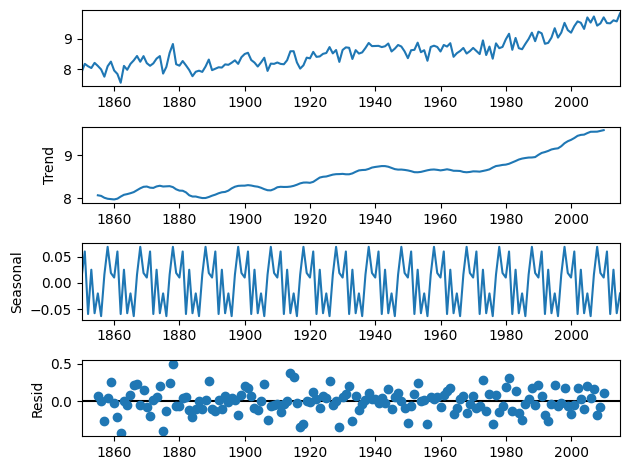

In [ ]:
result = seasonal_decompose(df_seasonality, model='additive',period=10)
result.plot()
plt.show()

The above confirms the seasonality assumptions that came with the monthly and yearly temperature datasets.

# Modeling and Feature Engineering

In [ ]:


# We plot the landaverage temperature over the years and try and fit a straight line using linear regression. 

fig = px.scatter(df_yearly, x='dt', y='LandAverageTemperature', trendline='ols', trendline_scope='overall')
fig.update_layout(
    title="Land Average Temperature",
    xaxis_title="Year",
    yaxis_title="Temperature (°C)",
    font=dict(size=14),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig.show("png")


So, from the above, we note that the land average temperature increased significantly from 1960 onwwards. We will replot the above graph using lowess and see
that the trend line curves upwards from 1960 onwards.

In [ ]:
fig = px.scatter(df_yearly, x='dt', y='LandAverageTemperature', trendline='lowess', trendline_scope='overall')
fig.update_layout(
    title="Land Average Temperature",
    xaxis_title="Year",
    yaxis_title="Temperature (°C)",
    font=dict(size=14),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig.show("png")

In [ ]:
df_yearly.head()


,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,LandAverageTemperatureUncertainty,LandAndOceanAverageTemperatureUncertainty
0,1850,7.900667,19.233,-3.206,14.867167,0.876417,0.308167
1,1851,8.178583,17.361,-3.242,14.991833,0.881917,0.312083
2,1852,8.100167,17.795,-2.755,15.006500,0.918250,0.316417
3,1853,8.041833,19.308,-4.015,14.955167,0.835000,0.283833
4,1854,8.210500,20.426,-4.109,14.991000,0.825667,0.276417


Logistic Regression Model to Classify the temperature as High or Low based on the LandAverageTemperature

In [ ]:
# Below is the temperature Differrence dataframe which shows the year-over-year temperature increase/decrease
# 1850 is set 0 as it is the base year
temp_diff_df = df_yearly['LandAverageTemperature'].diff().reset_index()
temp_diff_df.columns = ['Year', 'Temperature Difference']
temp_diff_df['Temperature Difference'] = df_yearly['LandAverageTemperature'].diff().fillna(0)
temp_diff_df['Year'] = pd.to_datetime(df_yearly['dt'], format='%Y').dt.year
temp_diff_df.head(10)

temp_diff = df_yearly['LandAverageTemperature'].diff().reset_index()

In [ ]:

# Split the data into training and testing sets

X = temp_diff_df['Year'].values.reshape(-1, 1)
y = temp_diff_df['Temperature Difference'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(temp_diff_df['Year'].values.reshape(-1, 1), 
                                                    temp_diff_df['Temperature Difference'].apply(lambda x: 1 if x > 0 else 0), 
                                                    test_size=0.6, random_state=101)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = logreg.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", logreg.score(X_test, y_test))
# Classify the temperature differences
temp_diff_df['Classification'] = logreg.predict(temp_diff_df['Year'].values.reshape(-1, 1))

# Map the classification labels to descriptive strings
temp_diff_df['Classification'] = temp_diff_df['Classification'].map({0: 'High Decrease', 1: 'Average', 2: 'High Increase'})

# Print the classified data
temp_diff_df.head(25)

Accuracy: 0.53


,Year,Temperature Difference,Classification
0,1850,0.000000,Average
1,1851,0.277917,Average
2,1852,-0.078417,Average
3,1853,-0.058333,Average
4,1854,0.168667,Average
5,1855,-0.099750,Average
6,1856,-0.114833,Average
7,1857,-0.237750,Average
8,1858,0.342083,Average
9,1859,0.151750,Average


In [ ]:
def plot_temp_difference(df):
    df['Year'] = pd.to_datetime(df['dt'], format='%Y').dt.year
    temp_diff = df['LandAverageTemperature'].diff()
    colors = []
    counter_average = 0
    counter_increase = 0
    counter_decrease = 0
    for diff in temp_diff:
        if diff > 0.2:
            counter_increase += 1
            colors.append('#e63946')
        elif diff < -0.2:
            counter_decrease += 1
            colors.append('#1bc730')
        else:
            counter_average += 1
            colors.append('#ffbe0b')
    print('Average: ', counter_average)
    print('Increase: ', counter_increase)
    print('Decrease: ', counter_decrease)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df['Year'], y=temp_diff, name='', marker=dict(color=colors), hovertemplate='Year: %{x}<br>Temperature Difference: %{y:.2f}<br>Percentage Change: %{y:.2%}'))
    fig.update_layout(title='Temperature Difference by Year', xaxis_title='Year', yaxis_title='Temperature Difference', legend=dict(title='Legend', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.show("png")

plot_temp_difference(df_yearly)

Average:  106
Increase:  30
Decrease:  30


In [ ]:
# Hence, for the purposes of this analysis, will consider data from 1960 onwards.
df_final = df_yearly[(df_yearly["dt"] > 1960)]

In [ ]:
# Create a scatter plot of the data
X = df_final['dt'].values.reshape(-1, 1)
y = df_final['LandAverageTemperature'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

# Create a linear regression object
lm = LinearRegression()

# Fit the model using the training data
lm.fit(X_train, y_train)

# Make predictions using the testing data
predictions = lm.predict(X_test)

trace1 = go.Scatter(x=X_test.flatten(), y=y_test.flatten(), mode='markers', name='Actual', marker=dict(color='green'))
trace2 = go.Scatter(x=X_test.flatten(), y=predictions.flatten(), mode='markers', name='Predicted', marker=dict(color='blue'))

# Add a trace for the regression line
trace3 = go.Scatter(x=X_test.flatten(), y=lm.predict(X_test).flatten(), mode='lines', name='Regression Line', line=dict(color='#FB4D3D', width=2))

# Set the layout
layout = go.Layout(title='Linear Regression Model: Actual vs. Predicted Temperature', xaxis=dict(title='Year'), yaxis=dict(title='Temperature (Celsius)'), paper_bgcolor='white')

# Create a new set of X values for the years 2016 to 2026
X_future = np.array(range(2016, 2027)).reshape(-1, 1)

# Use the trained model to predict the temperatures for the next 10 years
predictions_future = lm.predict(X_future)

# Plot the predicted temperatures for the next 10 years
trace4 = go.Scatter(x=X_future.flatten(), y=predictions_future.flatten(), mode='markers', name='Predicted Future', marker=dict(color='red'))

# Create the figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)

# Show the figure
fig.show("png")

# Print the evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Accuracy", lm.score(X_test, y_test))

MAE: 0.16750288304930813
MSE: 0.04085910299097662
RMSE: 0.20213634752556656
Accuracy 0.7665576842707285


In [ ]:
# Create a Random Forest regression object
rf = RandomForestRegressor(n_estimators=100, random_state=101)

# Fit the model using the training data
rf.fit(X_train, y_train)

# Make predictions using the testing data
predictions = rf.predict(X_test)

trace1 = go.Scatter(x=X_test.flatten(), y=y_test.flatten(), mode='markers', name='Actual', marker=dict(color='green'))
trace2 = go.Scatter(x=X_test.flatten(), y=predictions.flatten(), mode='markers', name='Predicted', marker=dict(color='blue'))

# Add a trace for the regression line
lowess = sm.nonparametric.lowess(y_test.flatten(), X_test.flatten(), frac=0.3)
trace3 = go.Scatter(x=lowess[:, 0], y=lowess[:, 1], mode='lines', name='Lowess Trendline', line=dict(color='#FB4D3D', width=2))

# Set the layout
layout = go.Layout(title='Random Forest Regressor Model: Actual vs. Predicted Temperature', xaxis=dict(title='Year'), yaxis=dict(title='Temperature (Celsius)'), paper_bgcolor='white')

# Create the figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show the figure
fig.show("png")


# Print the evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Accuracy", rf.score(X_test, y_test))

MAE: 0.1504842676767681
MSE: 0.030008716636132277
RMSE: 0.1732302416904516
Accuracy 0.8285497284375212
